
## **CAPSTONE PROJECT: Statistical Characteristics of Markets in emerging economies with a particular reference to the Indian, Chinese and South African markets**

#**Install required modules for the analysis**

In [ ]:
pip install python_settings

In [ ]:
#Install module config
!pip install config

In [ ]:
#pip install pingouin
!pip install pingouin

In [ ]:
#Install module arch
!pip install arch

In [1]:
!pip install Dash

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.4/10.4 MB 35.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.6/233.6 kB 25.1 MB/s eta 0:00:00
  Attempting uninstall: Werkzeug
    Found existing installation: Werkzeug 2.3.7
    Uninstalling Werkzeug-2.3.7:
      Successfully uninstalled Werkzeug-2.3.7


#**Importing the required libraries**

In [ ]:
import datetime
import pandas as pd
import numpy as np
import seaborn as sns
import pandas_datareader.data as web
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import statsmodels.api as sm
from statsmodels.tsa.regime_switching.markov_autoregression import MarkovAutoregression
from arch import arch_model
from python_settings import settings
from statsmodels.graphics.tsaplots import acf, pacf
from statsmodels.tsa.stattools import adfuller
from scipy.stats import shapiro
from plotly.subplots import make_subplots
from dash import Dash, dcc, html, Input, Output
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')
import yfinance as yfin
yfin.pdr_override()
import statsmodels.api as sm
from scipy.stats import norm, kurtosis

#**Extracting the data**

In [ ]:
#We extracted data from Yahoo Finance.
start = datetime.date(2013, 3, 1)
end = datetime.date(2023, 3, 1)
stocks = web.DataReader(["ABG.JO", "FSR.JO", "SBK.JO", "LHC.JO", "IMP.JO",
                         "NFTY", "^NSEI", "ICICIBANK.NS",
                         "BHARTIARTL.NS", "TCOM", "TCEHY", "INFY",
                         "VIPS", "BIDU", "NTES"],
                        start, end)["Adj Close"]

[*********************100%%**********************]  15 of 15 completed


In [ ]:
#We can have a glimpse of the returns
stocks.head().round(4)

ABG.JO  BHARTIARTL.NS   BIDU     FSR.JO  ICICIBANK.NS  \
Date                                                                   
2013-03-01  8337.6436       269.7003  92.56  1964.1499      167.0872   
2013-03-04  8302.7959       273.9915  90.26  1928.4951      167.4510   
2013-03-05  8401.7012       279.2364  91.37  2014.1920      172.9792   
2013-03-06  8463.1953       277.8060  89.93  1955.3927      175.3123   
2013-03-07  8404.2646       277.6327  90.42  1959.7715      176.7042   

                IMP.JO    INFY     LHC.JO     NFTY    NTES     SBK.JO   TCEHY  \
Date                                                                            
2013-03-01  10691.6523  5.2097  2260.2971  23.5400  8.6370  6897.8257  6.3656   
2013-03-04  10178.8545  5.1721  2249.6323  23.5400  8.8689  6751.2251  6.4813   
2013-03-05  10563.6465  5.2271  2246.2988  23.5400  9.0616  6912.4292  6.5731   
2013-03-06  10380.1172  5.2860  2266.9622  24.0348  9.0361  6804.3745  6.5951   
2013-03-07  10332.3076  5.2792  2309.6223  24.0348  9.1810  6746.5537  6.6374   

              TCOM   VIPS      ^NSEI  
Date                                  
2013-03-01   9.780  2.583  5719.7002  
2013-03-04   9.640  2.540  5698.5000  
2013-03-05   9.755  2.524  5784.2500  
2013-03-06  10.020  2.358  5818.6001  
2013-03-07  10.115  2.519  5863.2998

In [ ]:
#checking for missing values
stocks.isna().sum()

ABG.JO            52
BHARTIARTL.NS    135
BIDU              84
FSR.JO            52
ICICIBANK.NS     135
IMP.JO            52
INFY              84
LHC.JO            52
NFTY              84
NTES              84
SBK.JO            52
TCEHY             84
TCOM              84
VIPS              84
^NSEI            147
dtype: int64

In [ ]:
#We replaced missing values by using the values before them
stocks = stocks.fillna(method ='bfill')
stocks.isna().sum()

ABG.JO           0
BHARTIARTL.NS    0
BIDU             0
FSR.JO           0
ICICIBANK.NS     0
IMP.JO           0
INFY             0
LHC.JO           0
NFTY             0
NTES             0
SBK.JO           0
TCEHY            0
TCOM             0
VIPS             0
^NSEI            0
dtype: int64

In [ ]:
# We find the daily stock returns for each stock and store it as a new data frame called stock_returns
stock_returns = stocks.pct_change()
stock_returns = stock_returns.iloc[1: , :]

In [ ]:
stock_returns.head()

ABG.JO  BHARTIARTL.NS      BIDU    FSR.JO  ICICIBANK.NS  \
Date                                                                    
2013-03-04 -0.004180       0.015911 -0.024849 -0.018153      0.002177   
2013-03-05  0.011912       0.019143  0.012298  0.044437      0.033014   
2013-03-06  0.007319      -0.005123 -0.015760 -0.029193      0.013488   
2013-03-07 -0.006963      -0.000624  0.005449  0.002239      0.007939   
2013-03-08  0.009146       0.008275 -0.013271  0.003830      0.019827   

              IMP.JO      INFY    LHC.JO      NFTY      NTES    SBK.JO  \
Date                                                                     
2013-03-04 -0.047962 -0.007226 -0.004718  0.000000  0.026851 -0.021253   
2013-03-05  0.037803  0.010638 -0.001482  0.000000  0.021727  0.023878   
2013-03-06 -0.017374  0.011265  0.009199  0.021017 -0.002823 -0.015632   
2013-03-07 -0.004606 -0.001279  0.018818  0.000000  0.016041 -0.008498   
2013-03-08  0.015001  0.006766  0.009812  0.000000  0.007244  0.018959   

               TCEHY      TCOM      VIPS     ^NSEI  
Date                                                
2013-03-04  0.018171 -0.014315 -0.016647 -0.003707  
2013-03-05  0.014164  0.011929 -0.006299  0.015048  
2013-03-06  0.003352  0.027166 -0.065769  0.005939  
2013-03-07  0.006403  0.009481  0.068278  0.007682  
2013-03-08  0.018810  0.011369 -0.033744  0.014054

In [ ]:
# We find the log daily stock returns for each stock and store it as a new data frame called stock_log_returns
stock_log_returns = np.log(stocks / stocks.shift(1))
stock_log_returns = stock_returns.iloc[1: , :]

In [ ]:
stock_log_returns.head()

ABG.JO  BHARTIARTL.NS      BIDU    FSR.JO  ICICIBANK.NS  \
Date                                                                    
2013-03-05  0.011912       0.019143  0.012298  0.044437      0.033014   
2013-03-06  0.007319      -0.005123 -0.015760 -0.029193      0.013488   
2013-03-07 -0.006963      -0.000624  0.005449  0.002239      0.007939   
2013-03-08  0.009146       0.008275 -0.013271  0.003830      0.019827   
2013-03-11 -0.001208      -0.004800  0.002354 -0.003498     -0.006451   

              IMP.JO      INFY    LHC.JO      NFTY      NTES    SBK.JO  \
Date                                                                     
2013-03-05  0.037803  0.010638 -0.001482  0.000000  0.021727  0.023878   
2013-03-06 -0.017374  0.011265  0.009199  0.021017 -0.002823 -0.015632   
2013-03-07 -0.004606 -0.001279  0.018818  0.000000  0.016041 -0.008498   
2013-03-08  0.015001  0.006766  0.009812  0.000000  0.007244  0.018959   
2013-03-11  0.011030 -0.012895 -0.016290  0.000000  0.008298  0.011045   

               TCEHY      TCOM      VIPS     ^NSEI  
Date                                                
2013-03-05  0.014164  0.011929 -0.006299  0.015048  
2013-03-06  0.003352  0.027166 -0.065769  0.005939  
2013-03-07  0.006403  0.009481  0.068278  0.007682  
2013-03-08  0.018810  0.011369 -0.033744  0.014054  
2013-03-11 -0.016834 -0.003421  0.057929 -0.000563

#**Normality Test**

Normality of daily returns

In [ ]:
for column in stock_returns.columns:
    stat, p_value = shapiro(stock_returns[column])
    print(f'Stock: {column}')
    print(f'Shapiro-Wilk Statistic: {stat}')
    print(f'p-value: {p_value}')
    print(f'Is Normal: {p_value > 0.05}')
    print('\n')

Stock: ABG.JO
Shapiro-Wilk Statistic: 0.9318640232086182
p-value: 6.702519647542923e-33
Is Normal: False


Stock: BHARTIARTL.NS
Shapiro-Wilk Statistic: 0.9564303755760193
p-value: 3.251552532526826e-27
Is Normal: False


Stock: BIDU
Shapiro-Wilk Statistic: 0.8935454487800598
p-value: 3.849299619173985e-39
Is Normal: False


Stock: FSR.JO
Shapiro-Wilk Statistic: 0.9451369047164917
p-value: 4.490315069293647e-30
Is Normal: False


Stock: ICICIBANK.NS
Shapiro-Wilk Statistic: 0.9336710572242737
p-value: 1.5278636230974473e-32
Is Normal: False


Stock: IMP.JO
Shapiro-Wilk Statistic: 0.9413143396377563
p-value: 6.13829561284703e-31
Is Normal: False


Stock: INFY
Shapiro-Wilk Statistic: 0.9026458859443665
p-value: 7.596698495580426e-38
Is Normal: False


Stock: LHC.JO
Shapiro-Wilk Statistic: 0.9375326633453369
p-value: 9.445929358857462e-32
Is Normal: False


Stock: NFTY
Shapiro-Wilk Statistic: 0.8531711101531982
p-value: 5.465064010866787e-44
Is Normal: False


Stock: NTES
Shapiro-Wilk Stati

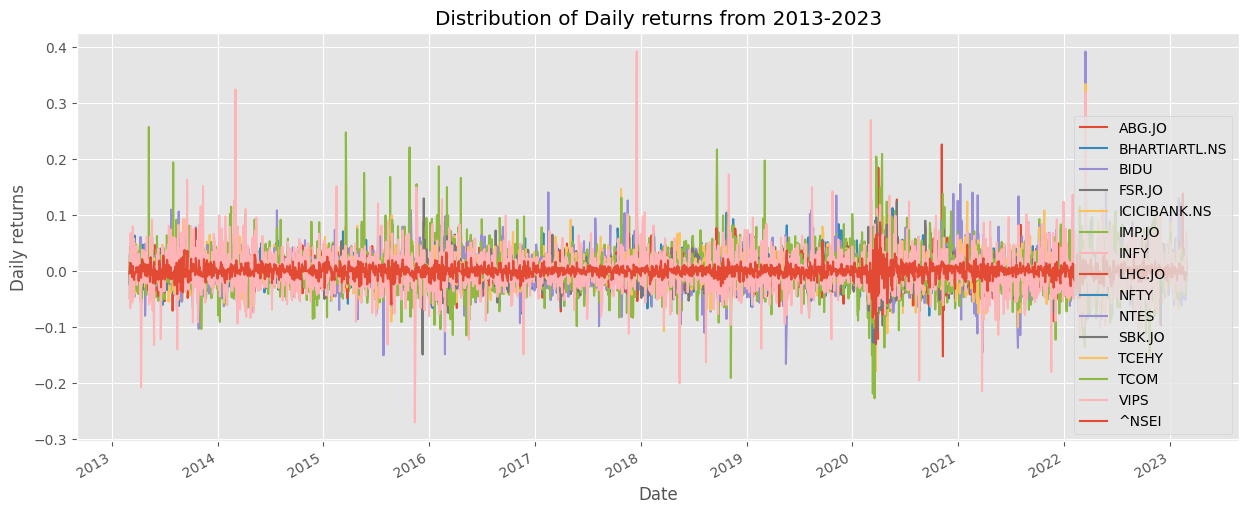

In [ ]:
fig_dims = (15, 6)
plt.style.use('ggplot')
stock_returns.plot(figsize=fig_dims)
# Add axes
plt.xlabel("Date")
plt.ylabel("Daily returns")
# Add title
plt.title("Distribution of Daily returns from 2013-2023")
# Add legend
plt.legend();

Normality of daily log returns


In [ ]:
for column in stock_log_returns.columns:
    stat, p_value = shapiro(stock_log_returns[column])
    print(f'Stock: {column}')
    print(f'Shapiro-Wilk Statistic: {stat}')
    print(f'p-value: {p_value}')
    print(f'Is Normal: {p_value > 0.05}')
    print('\n')

Stock: ABG.JO
Shapiro-Wilk Statistic: 0.9319067001342773
p-value: 6.91992218493972e-33
Is Normal: False


Stock: BHARTIARTL.NS
Shapiro-Wilk Statistic: 0.9563705325126648
p-value: 3.1653001451534322e-27
Is Normal: False


Stock: BIDU
Shapiro-Wilk Statistic: 0.8934808969497681
p-value: 3.8249744791317704e-39
Is Normal: False


Stock: FSR.JO
Shapiro-Wilk Statistic: 0.9450862407684326
p-value: 4.42327916553405e-30
Is Normal: False


Stock: ICICIBANK.NS
Shapiro-Wilk Statistic: 0.9337223172187805
p-value: 1.5841834676236632e-32
Is Normal: False


Stock: IMP.JO
Shapiro-Wilk Statistic: 0.9411957859992981
p-value: 5.851277978393194e-31
Is Normal: False


Stock: INFY
Shapiro-Wilk Statistic: 0.9026607275009155
p-value: 7.740938630668466e-38
Is Normal: False


Stock: LHC.JO
Shapiro-Wilk Statistic: 0.9375630617141724
p-value: 9.705149373100793e-32
Is Normal: False


Stock: NFTY
Shapiro-Wilk Statistic: 0.853287935256958
p-value: 5.74532370373175e-44
Is Normal: False


Stock: NTES
Shapiro-Wilk Statis

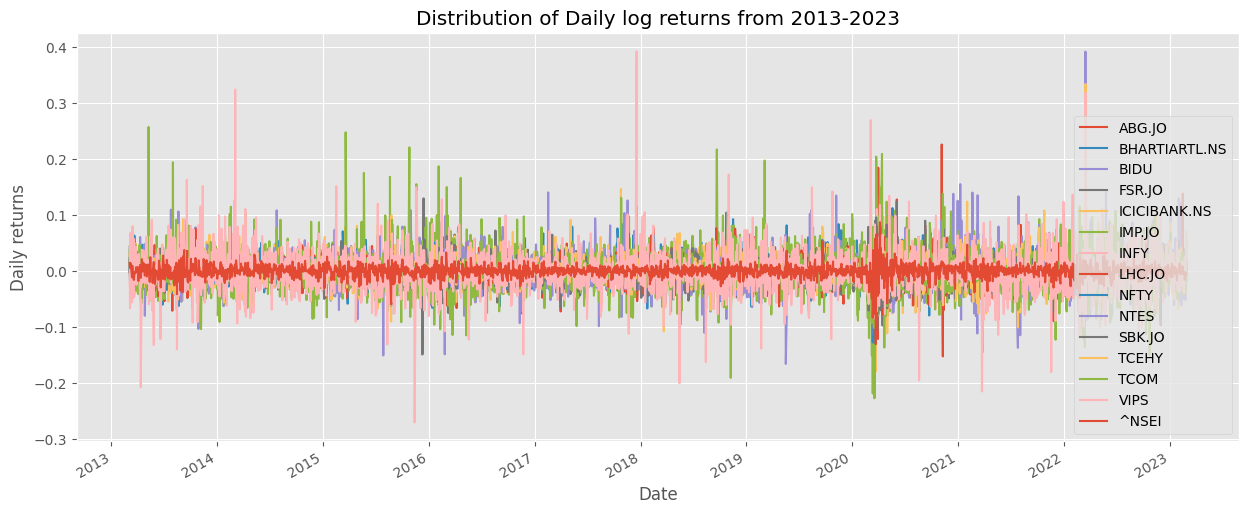

In [ ]:
fig_dims = (15, 6)
plt.style.use('ggplot')
stock_log_returns.plot(figsize=fig_dims)
# Add axes
plt.xlabel("Date")
plt.ylabel("Daily returns")
# Add title
plt.title("Distribution of Daily log returns from 2013-2023")
# Add legend
plt.legend();

Our results show that our data sets come from non-gaussian distributions. The
returns are not normally distributed. This proves one of the stylized facts on returns which states that stock returns are not normally distributed. P value is less than the threshold, alpha of 0.05 then there is enough evidence that the data set is not coming from a normal distribution.  


Kurtosis test

In [ ]:
#We checked the kurtosis test our data to ascertain the tailedness of returns.

kurtosis(stock_log_returns[column])

16.05929468583308

#**Correlation Matrix**

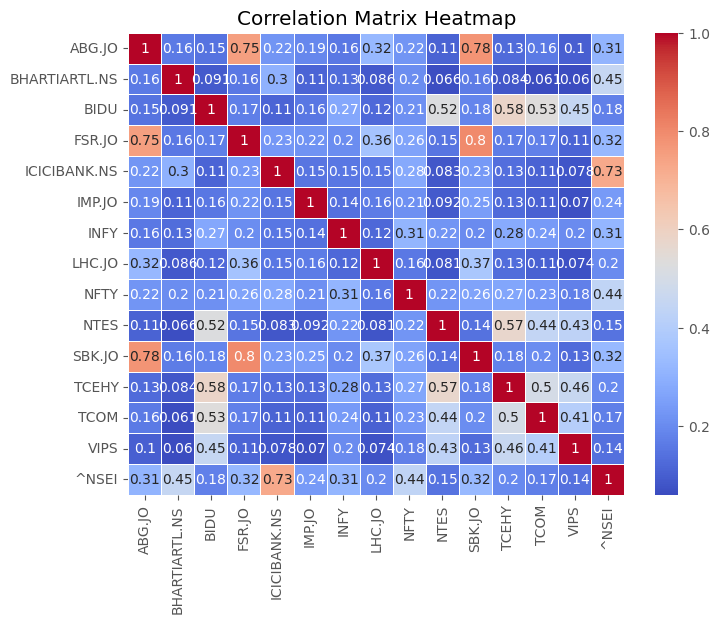

In [ ]:
# Calculate the correlation matrix
correlation_matrix = stock_returns.corr()

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

# **Stationarity Tests**

In [ ]:
# Loop through each column and perform ADF test for stationarity
for column in stock_returns.columns:
    result = adfuller(stock_returns[column])
    print(f'Column: {column}')
    print(f'ADF Statistic: {result[0]}')
    print(f'p-value: {result[1]}')
    print('Critical Values:')
    for key, value in result[4].items():
        print(f'   {key}: {value}')
    print(f'Is Stationary: {result[1] <= 0.05}')
    print('\n')

Column: ABG.JO
ADF Statistic: -37.784390331740184
p-value: 0.0
Critical Values:
   1%: -3.4328695430687004
   5%: -2.8626531392022194
   10%: -2.5673625639785684
Is Stationary: True


Column: BHARTIARTL.NS
ADF Statistic: -31.30364167664406
p-value: 0.0
Critical Values:
   1%: -3.4328705142046463
   5%: -2.862653568070648
   10%: -2.5673627923113798
Is Stationary: True


Column: BIDU
ADF Statistic: -25.512146593991734
p-value: 0.0
Critical Values:
   1%: -3.4328714860895135
   5%: -2.862653997269672
   10%: -2.567363020820226
Is Stationary: True


Column: FSR.JO
ADF Statistic: -12.2389673433854
p-value: 1.0128023436988423e-22
Critical Values:
   1%: -3.4328871388119677
   5%: -2.8626609097288895
   10%: -2.567366701069647
Is Stationary: True


Column: ICICIBANK.NS
ADF Statistic: -14.701370425804898
p-value: 2.943073821777323e-27
Critical Values:
   1%: -3.4328802668982084
   5%: -2.862657875000973
   10%: -2.5673650853551155
Is Stationary: True


Column: IMP.JO
ADF Statistic: -49.558572

Our results shows that the data Stationary.

Stationary time series allow for more reliable statistical inference, including hypothesis testing, confidence intervals, and parameter estimation.

#**Grouping the data by country**

Glossary
* Stock daily returns India = SR_India
* Stock daily returns South Atrica = SR_SA
* Stock daily returns China = SR_China
* Stock log daily returns India = SR_log_India
* Stock log daily returns South Africa = SR_log_SA
* Stock log daily returns China = SR_log_China

In [ ]:
India = ['BHARTIARTL.NS','ICICIBANK.NS','^NSEI','NFTY','INFY']
South_Africa = ['ABG.JO','FSR.JO','SBK.JO','IMP.JO','LHC.JO']
China = ['VIPS','BIDU','NTES','TCOM','TCEHY']
SR_India = stock_returns[India]
SR_SA = stock_returns[South_Africa]
SR_China = stock_returns[China]
SR_log_India = stock_log_returns[India]
SR_log_SA = stock_log_returns[South_Africa]
SR_log_China = stock_log_returns[China]

#**Visualization of daily returns and log daily returns by contry**

Visualization of daily and log daily returns of Indian stocks

In [ ]:
# Create subplots
fig = make_subplots(rows=2, cols=1, shared_xaxes=True, subplot_titles=["Daily Returns", "Log Returns"])

# Add traces for each stock's daily returns
for column in SR_India.columns:
    trace = go.Scatter(x=SR_India.index, y=SR_India[column], mode='lines', name=column)
    fig.add_trace(trace, row=1, col=1)

# Add traces for each stock's log returns
for column in SR_log_India.columns:
    trace = go.Scatter(x=SR_log_India.index, y=SR_log_India[column], mode='lines', name=column)
    fig.add_trace(trace, row=2, col=1)

# Update layout
fig.update_layout(title='Daily and Log Returns for Indian Stocks', height=800, showlegend=True)

# Show the plot
fig.show()

Visualization of daily and log daily returns of South African stocks

In [ ]:
# Create subplots
fig = make_subplots(rows=2, cols=1, shared_xaxes=True, subplot_titles=["Daily Returns", "Log Returns"])

# Add traces for each stock's daily returns
for column in SR_SA.columns:
    trace = go.Scatter(x=SR_SA.index, y=SR_SA[column], mode='lines', name=column)
    fig.add_trace(trace, row=1, col=1)

# Add traces for each stock's log returns
for column in SR_log_SA.columns:
    trace = go.Scatter(x=SR_log_SA.index, y=SR_log_SA[column], mode='lines', name=column)
    fig.add_trace(trace, row=2, col=1)

# Update layout
fig.update_layout(title='Daily and Log Returns for South African Stocks', height=800, showlegend=True)

# Show the plot
fig.show()

Visualization of daily and log daily returns of Chinese stocks

In [ ]:
# Create subplots
fig = make_subplots(rows=2, cols=1, shared_xaxes=True, subplot_titles=["Daily Returns", "Log Returns"])

# Add traces for each stock's daily returns
for column in SR_China.columns:
    trace = go.Scatter(x=SR_China.index, y=SR_China[column], mode='lines', name=column)
    fig.add_trace(trace, row=1, col=1)

# Add traces for each stock's log returns
for column in SR_log_China.columns:
    trace = go.Scatter(x=SR_log_China.index, y=SR_log_China[column], mode='lines', name=column)
    fig.add_trace(trace, row=2, col=1)

# Update layout
fig.update_layout(title='Daily and Log Returns for Chinese Stocks', height=800, showlegend=True)

# Show the plot
fig.show()

#**Interactive Visulization of Daily returns**


Indian Stocks

In [ ]:
# Initialize Dash app
app = Dash(__name__)

# Define app layout
app.layout = html.Div([
    dcc.Dropdown(
        id='column-dropdown',
        options=[{'label': col, 'value': col} for col in SR_India.columns[0:5]],
        value=['NFTY'], # Default selected columns
        multi=True
    ),
    dcc.Graph(id='multi-column-graph'),
])

# Define callback to update graph
@app.callback(
    Output('multi-column-graph', 'figure'),
    Input('column-dropdown', 'value')
)
def update_graph(selected_columns):
    SR_India['index']=SR_India.index
    x_column = SR_India['index']

    traces = []
    for column in selected_columns:
        trace = {
            'x': x_column,
            'y': SR_India[column],
            'name': column,
            'mode': 'lines+markers',
        }
        traces.append(trace)

    layout = {
        'title': 'Daily Returns for Indian Stocks',
        'xaxis': {'title': x_column},
        'yaxis': {'title': 'Values'},
    }

    return {'data': traces, 'layout': layout}

# Run the app
if __name__ == '__main__':
    app.run_server(debug=True)


<IPython.core.display.Javascript object>

Chinese Stocks

In [ ]:
# Initialize Dash app
app = Dash(__name__)

# Define app layout
app.layout = html.Div([
    dcc.Dropdown(
        id='column-dropdown',
        options=[{'label': col, 'value': col} for col in SR_China.columns[0:5]],
        value=['VIPS'], # Default selected columns
        multi=True
    ),
    dcc.Graph(id='multi-column-graph'),
])

# Define callback to update graph
@app.callback(
    Output('multi-column-graph', 'figure'),
    Input('column-dropdown', 'value')
)
def update_graph(selected_columns):
    SR_China['index']=SR_China.index
    x_column = SR_China['index']

    traces = []
    for column in selected_columns:
        trace = {
            'x': x_column,
            'y': SR_China[column],
            'name': column,
            'mode': 'lines+markers',
        }
        traces.append(trace)

    layout = {
        'title': 'Daily Returns for Chinese Stocks',
        'xaxis': {'title': x_column},
        'yaxis': {'title': 'Values'},
    }

    return {'data': traces, 'layout': layout}

# Run the app
if __name__ == '__main__':
    app.run_server(debug=True)


<IPython.core.display.Javascript object>

South African Stocks

In [ ]:
# Initialize Dash app
app = Dash(__name__)

# Define app layout
app.layout = html.Div([
    dcc.Dropdown(
        id='column-dropdown',
        options=[{'label': col, 'value': col} for col in SR_SA.columns[0:5]],
        value=['ABG.JO'], # Default selected columns
        multi=True
    ),
    dcc.Graph(id='multi-column-graph'),
])

# Define callback to update graph
@app.callback(
    Output('multi-column-graph', 'figure'),
    Input('column-dropdown', 'value')
)
def update_graph(selected_columns):
    SR_SA['index']=SR_SA.index
    x_column = SR_SA['index']

    traces = []
    for column in selected_columns:
        trace = {
            'x': x_column,
            'y': SR_SA[column],
            'name': column,
            'mode': 'lines+markers',
        }
        traces.append(trace)

    layout = {
        'title': 'Daily Returns for Chinese Stocks',
        'xaxis': {'title': x_column},
        'yaxis': {'title': 'Values'},
    }

    return {'data': traces, 'layout': layout}

# Run the app
if __name__ == '__main__':
    app.run_server(debug=True)


<IPython.core.display.Javascript object>

#**ACF & PACF**

In [ ]:
# Create a Plotly figure
fig = go.Figure()

# Plot ACF for each column on the same graph
for column in stock_returns.columns:
    acf_values = acf(stock_returns[column])
    lag_values = np.arange(len(acf_values))
    fig.add_trace(go.Scatter(x=lag_values, y=acf_values, mode='lines', name=f'{column}'))

# Update layout
fig.update_layout(
    title="ACF Plots",
    xaxis_title="Lags",
    yaxis_title="ACF",
)

# Show the plot
fig.show()

In [ ]:
# Create a Plotly figure
fig = go.Figure()

# Calculate and plot PACF for each column on the same graph
for column in stock_returns.columns:
    pacf_values = pacf(stock_returns[column])
    lag_values = np.arange(len(pacf_values))
    fig.add_trace(go.Scatter(x=lag_values, y=pacf_values, mode='lines', name=f'{column}'))

# Update layout
fig.update_layout(
    title="PACF Plots",
    xaxis_title="Lags",
    yaxis_title="PACF",
)

# Show the plot
fig.show()

# **Garch Model**

**Indian Stocks**

Iteration:      1,   Func. Count:      6,   Neg. LLF: 69663233.9179418
Iteration:      2,   Func. Count:     17,   Neg. LLF: -6632.418267714216
Optimization terminated successfully    (Exit mode 0)
            Current function value: -6632.4182607101675
            Iterations: 6
            Function evaluations: 17
            Gradient evaluations: 2
Iteration:      1,   Func. Count:      6,   Neg. LLF: 2673477698174.6094
Iteration:      2,   Func. Count:     18,   Neg. LLF: 69916826.21585898
Iteration:      3,   Func. Count:     30,   Neg. LLF: 46138519373.19482
Optimization terminated successfully    (Exit mode 0)
            Current function value: -6569.920116248169
            Iterations: 4
            Function evaluations: 40
            Gradient evaluations: 3
Iteration:      1,   Func. Count:      6,   Neg. LLF: 2.6093148594144763e+21
Iteration:      2,   Func. Count:     19,   Neg. LLF: 7.464537730948114e+17
Iteration:      3,   Func. Count:     31,   Neg. LLF: -8529.166566130

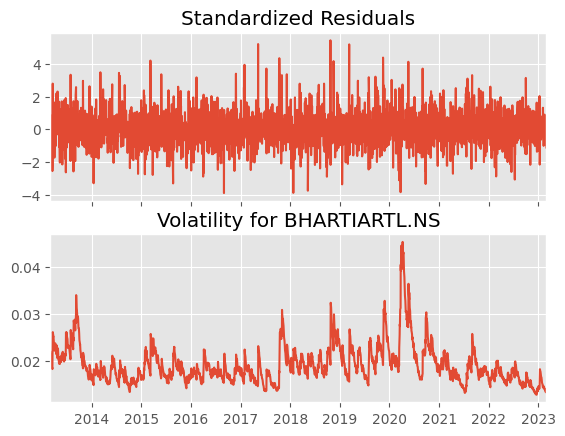

Model summary for ICICIBANK.NS:
                     Constant Mean - GARCH Model Results                      
Dep. Variable:           ICICIBANK.NS   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:                6569.92
Distribution:                  Normal   AIC:                          -13131.8
Method:            Maximum Likelihood   BIC:                          -13108.4
                                        No. Observations:                 2600
Date:                Mon, Aug 21 2023   Df Residuals:                     2599
Time:                        10:56:38   Df Model:                            1
                                 Mean Model                                 
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
mu         1.2135e-03  1.5

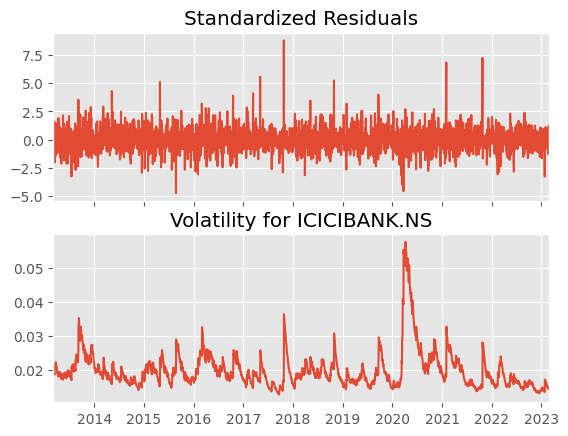

Model summary for ^NSEI:
                     Constant Mean - GARCH Model Results                      
Dep. Variable:                  ^NSEI   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:                8529.17
Distribution:                  Normal   AIC:                          -17050.3
Method:            Maximum Likelihood   BIC:                          -17026.9
                                        No. Observations:                 2600
Date:                Mon, Aug 21 2023   Df Residuals:                     2599
Time:                        10:56:39   Df Model:                            1
                                 Mean Model                                 
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
mu         7.7155e-04  1.039e-05 

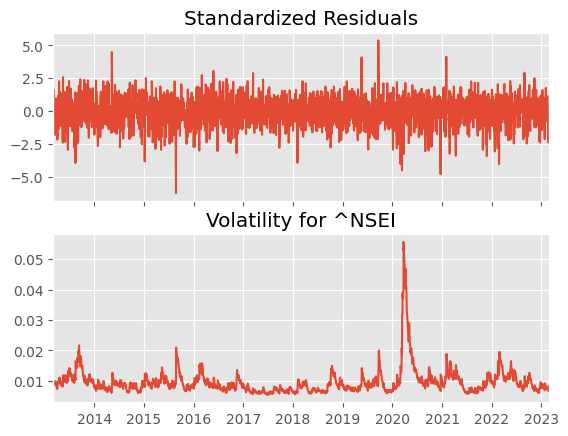

Model summary for NFTY:
                     Constant Mean - GARCH Model Results                      
Dep. Variable:                   NFTY   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:                7624.96
Distribution:                  Normal   AIC:                          -15241.9
Method:            Maximum Likelihood   BIC:                          -15218.5
                                        No. Observations:                 2600
Date:                Mon, Aug 21 2023   Df Residuals:                     2599
Time:                        10:56:39   Df Model:                            1
                                  Mean Model                                 
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
mu         4.1284e-04  2.871e-0

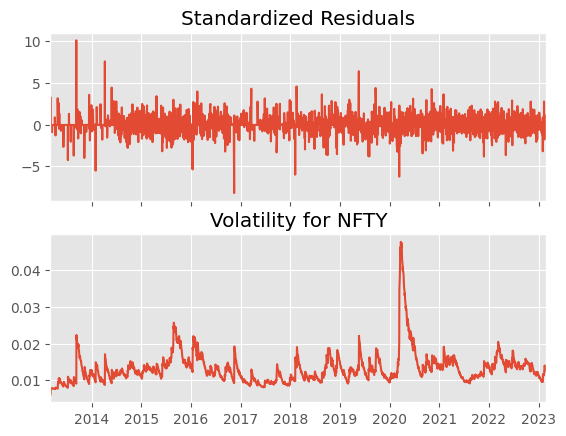

Model summary for INFY:
                     Constant Mean - GARCH Model Results                      
Dep. Variable:                   INFY   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:                6933.13
Distribution:                  Normal   AIC:                          -13858.3
Method:            Maximum Likelihood   BIC:                          -13834.8
                                        No. Observations:                 2600
Date:                Mon, Aug 21 2023   Df Residuals:                     2599
Time:                        10:56:39   Df Model:                            1
                                  Mean Model                                 
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
mu         5.2741e-04  4.070e-0

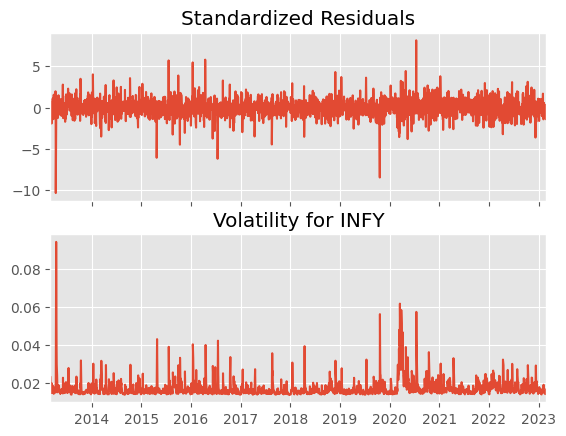

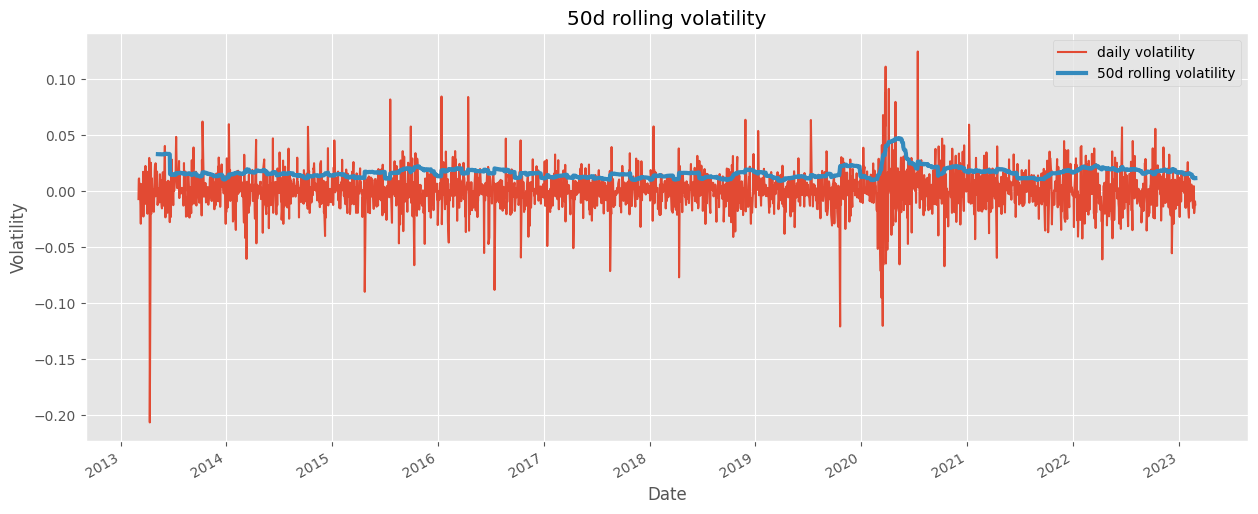

In [ ]:
# Fit GARCH(1, 1) model for Indian stock
models = {}
for column in SR_India.columns:
    model = arch_model(SR_India[column], vol='Garch', p=1, q=1)
    models[column] = model.fit()

# Display model summaries and plot volatility
for column, model in models.items():
    print(f"Model summary for {column}:")
    print(model.summary())
    print(sm.stats.acorr_ljungbox(model.resid, lags=[35], return_df=True))
    model.plot()
    plt.title(f"Volatility for {column}")
    plt.show()
#50 day rolling volatility
rolling_50d_volatility = SR_India[column].rolling(window=50).std().dropna()
#50 day plot
fig, ax = plt.subplots(figsize=(15, 6))

# Plot daily volatility
SR_India[column].plot(ax=ax, label="daily volatility")

# Plot rolling_50d_volatility
rolling_50d_volatility.plot(ax=ax, label="50d rolling volatility", linewidth=3)

# Add x-axis label
plt.xlabel("Date")
#Add title
plt.title("50d rolling volatility")
plt.ylabel("Volatility")

# Add legend
plt.legend();


**South African Stocks**

Iteration:      1,   Func. Count:      6,   Neg. LLF: 7.441977983638425e+18
Iteration:      2,   Func. Count:     17,   Neg. LLF: -6611.418039629164
Optimization terminated successfully    (Exit mode 0)
            Current function value: -6611.41802915484
            Iterations: 6
            Function evaluations: 17
            Gradient evaluations: 2
Iteration:      1,   Func. Count:      6,   Neg. LLF: 171919499.5382803
Iteration:      2,   Func. Count:     17,   Neg. LLF: -6716.577350471706
Optimization terminated successfully    (Exit mode 0)
            Current function value: -6716.577361204021
            Iterations: 6
            Function evaluations: 17
            Gradient evaluations: 2
Iteration:      1,   Func. Count:      6,   Neg. LLF: 201431399.01861307
Iteration:      2,   Func. Count:     17,   Neg. LLF: -6780.021447673447
Optimization terminated successfully    (Exit mode 0)
            Current function value: -6780.021455093269
            Iterations: 6
          

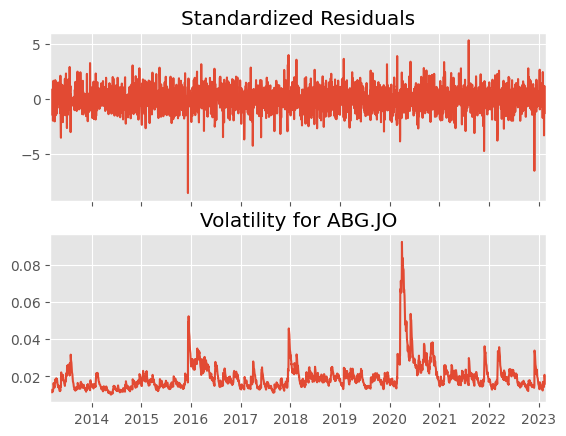

Model summary for FSR.JO:
                     Constant Mean - GARCH Model Results                      
Dep. Variable:                 FSR.JO   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:                6716.58
Distribution:                  Normal   AIC:                          -13425.2
Method:            Maximum Likelihood   BIC:                          -13401.7
                                        No. Observations:                 2600
Date:                Mon, Aug 21 2023   Df Residuals:                     2599
Time:                        10:56:49   Df Model:                            1
                                 Mean Model                                 
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
mu         7.8077e-04  7.318e-06

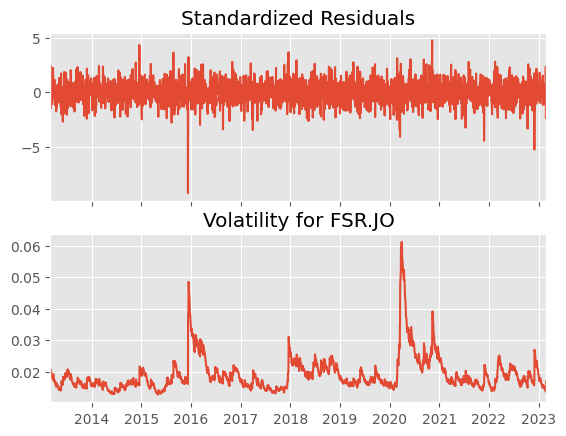

Model summary for SBK.JO:
                     Constant Mean - GARCH Model Results                      
Dep. Variable:                 SBK.JO   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:                6780.02
Distribution:                  Normal   AIC:                          -13552.0
Method:            Maximum Likelihood   BIC:                          -13528.6
                                        No. Observations:                 2600
Date:                Mon, Aug 21 2023   Df Residuals:                     2599
Time:                        10:56:49   Df Model:                            1
                                 Mean Model                                 
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
mu         6.8050e-04  6.408e-06

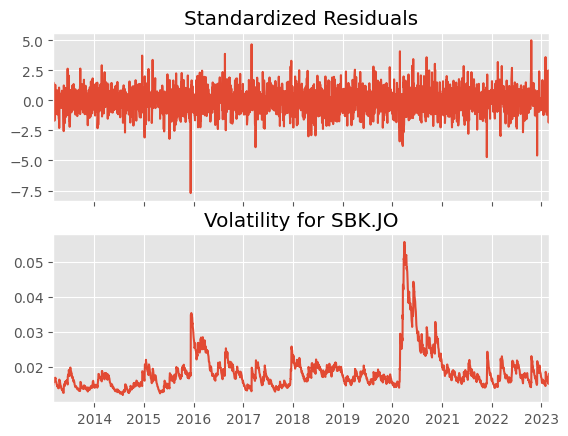

Model summary for IMP.JO:
                     Constant Mean - GARCH Model Results                      
Dep. Variable:                 IMP.JO   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:                5363.27
Distribution:                  Normal   AIC:                          -10718.5
Method:            Maximum Likelihood   BIC:                          -10695.1
                                        No. Observations:                 2600
Date:                Mon, Aug 21 2023   Df Residuals:                     2599
Time:                        10:56:49   Df Model:                            1
                                  Mean Model                                 
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
mu         3.5500e-04  5.741e

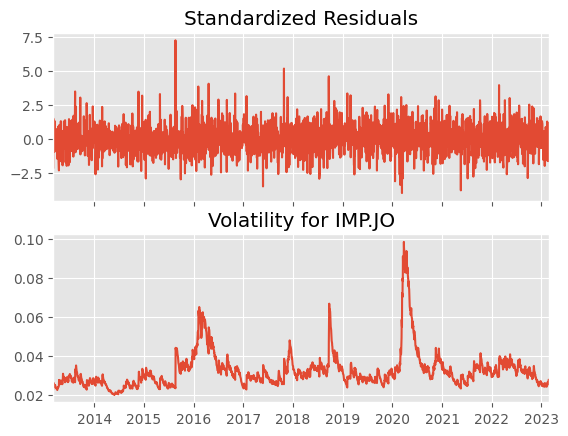

Model summary for LHC.JO:
                     Constant Mean - GARCH Model Results                      
Dep. Variable:                 LHC.JO   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:                6767.18
Distribution:                  Normal   AIC:                          -13526.4
Method:            Maximum Likelihood   BIC:                          -13502.9
                                        No. Observations:                 2600
Date:                Mon, Aug 21 2023   Df Residuals:                     2599
Time:                        10:56:49   Df Model:                            1
                                 Mean Model                                 
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
mu         3.9896e-04  3.186e-05

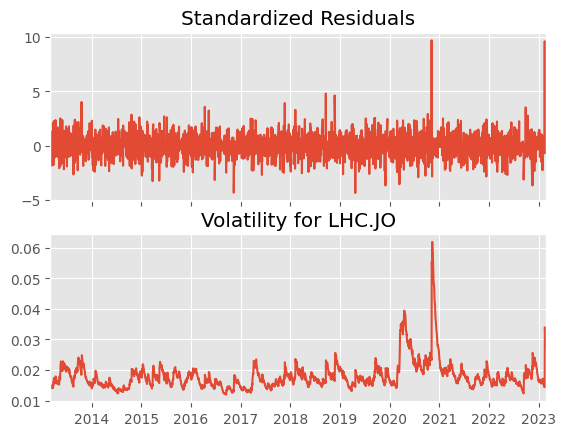

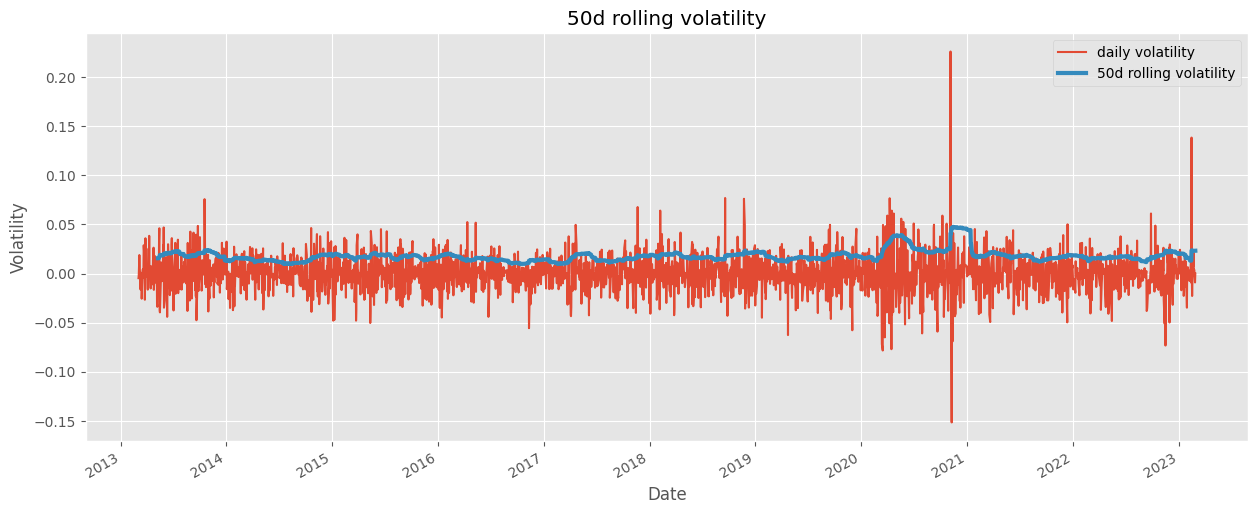

In [ ]:
# Fit GARCH(1, 1) model for South Africa stock
models = {}
for column in SR_SA.columns:
    model = arch_model(SR_SA[column], vol='Garch', p=1, q=1)
    models[column] = model.fit()

# Display model summaries and plot volatility
for column, model in models.items():
    print(f"Model summary for {column}:")
    print(model.summary())
    print(sm.stats.acorr_ljungbox(model.resid, lags=[20], return_df=True))
    model.plot()
    plt.title(f"Volatility for {column}")
    plt.show()

#Leveraged effect
#50 day rolling volatility
rolling_50d_volatility = SR_SA[column].rolling(window=50).std().dropna()
#50 day plot
fig, ax = plt.subplots(figsize=(15, 6))

# Plot daily volatility
SR_SA[column].plot(ax=ax, label="daily volatility")

# Plot rolling_50d_volatility
rolling_50d_volatility.plot(ax=ax, label="50d rolling volatility", linewidth=3)

# Add x-axis label
plt.xlabel("Date")
#Add title
plt.title("50d rolling volatility")
plt.ylabel("Volatility")

# Add legend
plt.legend();

**Chinese Stocks**

Iteration:      1,   Func. Count:      6,   Neg. LLF: 16259.163221642784
Iteration:      2,   Func. Count:     15,   Neg. LLF: 4988.493416124027
Iteration:      3,   Func. Count:     24,   Neg. LLF: 1733.3992640588654
Iteration:      4,   Func. Count:     31,   Neg. LLF: 1222.5099078368967
Iteration:      5,   Func. Count:     37,   Neg. LLF: 1161.5372337193317
Iteration:      6,   Func. Count:     42,   Neg. LLF: 1161.6594901357262
Iteration:      7,   Func. Count:     48,   Neg. LLF: 1161.388859971397
Iteration:      8,   Func. Count:     53,   Neg. LLF: 1161.3750641653426
Iteration:      9,   Func. Count:     58,   Neg. LLF: 1161.3748845016198
Iteration:     10,   Func. Count:     63,   Neg. LLF: 1161.3748306917987
Iteration:     11,   Func. Count:     67,   Neg. LLF: 1161.3748306916405
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1161.3748306917987
            Iterations: 11
            Function evaluations: 67
            Gradient evalu

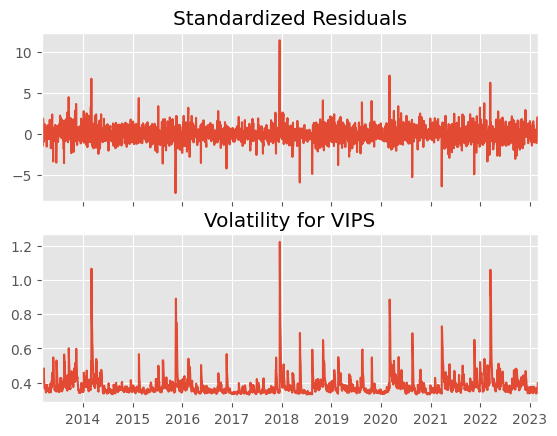

Model summary for BIDU:
                     Constant Mean - GARCH Model Results                      
Dep. Variable:                   BIDU   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -6101.97
Distribution:                  Normal   AIC:                           12211.9
Method:            Maximum Likelihood   BIC:                           12235.4
                                        No. Observations:                 2600
Date:                Mon, Aug 21 2023   Df Residuals:                     2599
Time:                        10:57:00   Df Model:                            1
                                 Mean Model                                
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
mu             0.0692  4.588e-02     

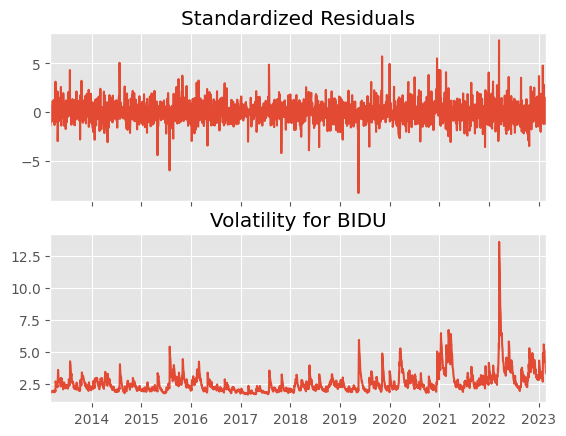

Model summary for NTES:
                     Constant Mean - GARCH Model Results                      
Dep. Variable:                   NTES   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -6025.81
Distribution:                  Normal   AIC:                           12059.6
Method:            Maximum Likelihood   BIC:                           12083.1
                                        No. Observations:                 2600
Date:                Mon, Aug 21 2023   Df Residuals:                     2599
Time:                        10:57:00   Df Model:                            1
                                Mean Model                                
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
mu             0.1269  4.618e-02      2.

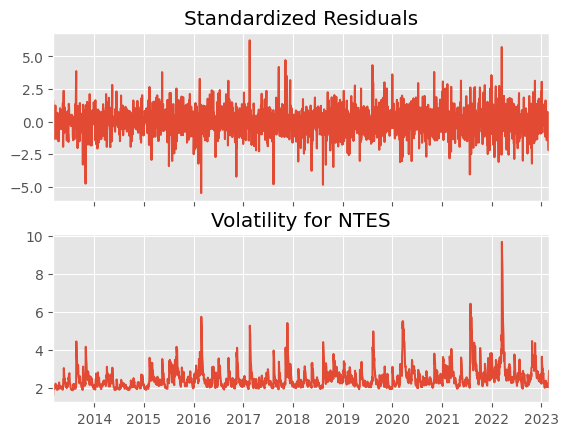

Model summary for TCOM:
                     Constant Mean - GARCH Model Results                      
Dep. Variable:                   TCOM   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -6399.09
Distribution:                  Normal   AIC:                           12806.2
Method:            Maximum Likelihood   BIC:                           12829.6
                                        No. Observations:                 2600
Date:                Mon, Aug 21 2023   Df Residuals:                     2599
Time:                        10:57:00   Df Model:                            1
                                 Mean Model                                
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
mu             0.0677  5.747e-02     

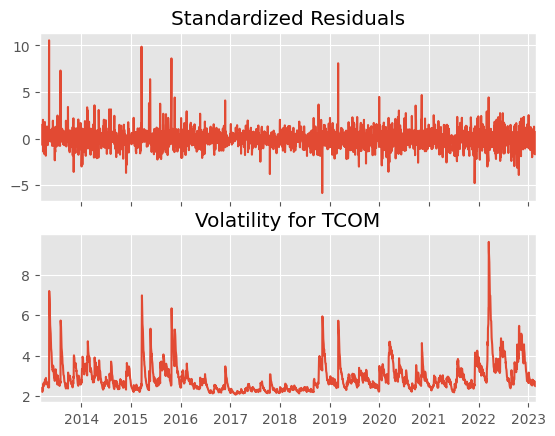

Model summary for TCEHY:
                     Constant Mean - GARCH Model Results                      
Dep. Variable:                  TCEHY   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -5685.56
Distribution:                  Normal   AIC:                           11379.1
Method:            Maximum Likelihood   BIC:                           11402.6
                                        No. Observations:                 2600
Date:                Mon, Aug 21 2023   Df Residuals:                     2599
Time:                        10:57:00   Df Model:                            1
                                Mean Model                                
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
mu             0.1502  3.862e-02      3

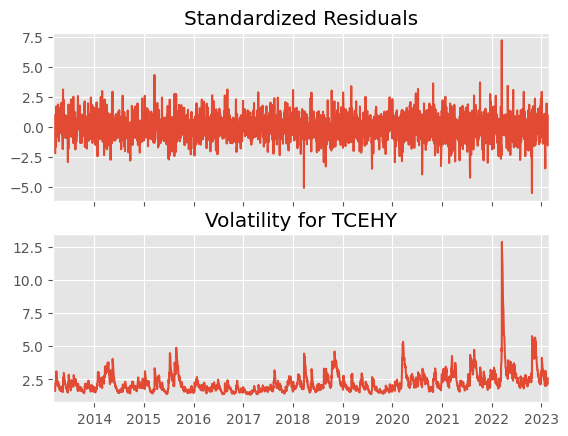

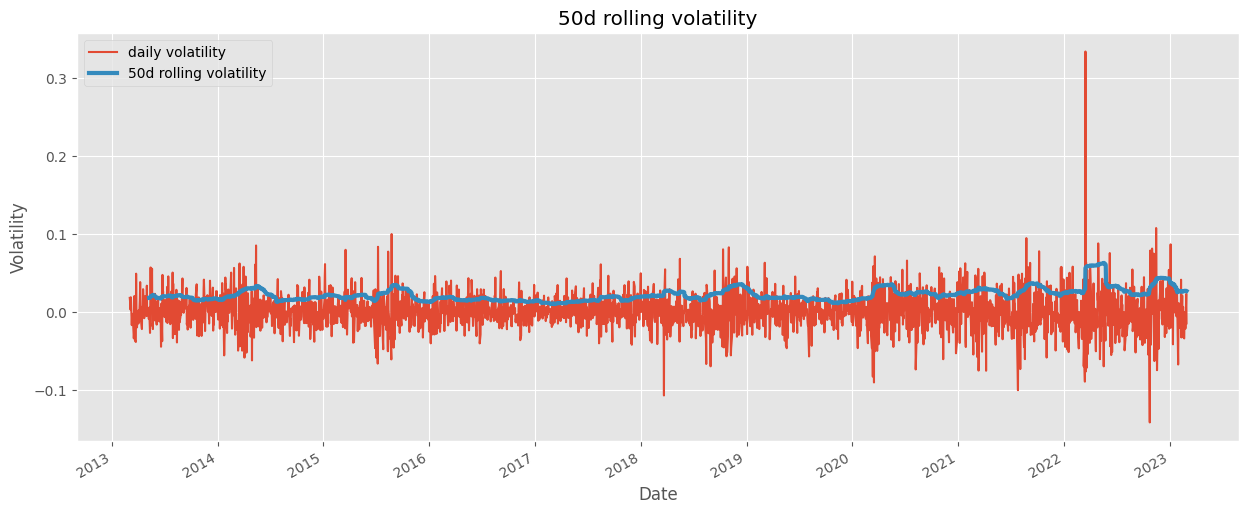

In [ ]:
# Fit GARCH(1, 1) model for Chinese stock
models = {}
for column in SR_China.columns:
    model = arch_model(SR_China[column], vol='Garch', p=1, q=1, rescale=True)
    models[column] = model.fit()

# Display model summaries and plot volatility
for column, model in models.items():
    print(f"Model summary for {column}:")
    print(model.summary())
    print(sm.stats.acorr_ljungbox(model.resid, lags=[20], return_df=True))
    model.plot()
    plt.title(f"Volatility for {column}")
    plt.show()

#Leveraged Effect
#50 day rolling volatility
rolling_50d_volatility = SR_China[column].rolling(window=50).std().dropna()
#50 day plot
fig, ax = plt.subplots(figsize=(15, 6))

# Plot daily volatility
SR_China[column].plot(ax=ax, label="daily volatility")

# Plot rolling_50d_volatility
rolling_50d_volatility.plot(ax=ax, label="50d rolling volatility", linewidth=3)

# Add x-axis label
plt.xlabel("Date")
#Add title
plt.title("50d rolling volatility")
plt.ylabel("Volatility")

# Add legend
plt.legend();

# **Markov switching autoregressive (MS-AR) model**

We also checked regime changes of stocks from 2013 to 2023. We implemented a Markov switching autoregressive (MS-AR) model. We then plotted the graphs to show the probabilities of high variance and probabilities of low variance.

**Indian Stocks**

Model summary for BHARTIARTL.NS:
                        Markov Switching Model Results                        
Dep. Variable:          BHARTIARTL.NS   No. Observations:                 2600
Model:               MarkovRegression   Log Likelihood                6727.903
Date:                Mon, 21 Aug 2023   AIC                         -13447.806
Time:                        10:57:20   BIC                         -13424.353
Sample:                             0   HQIC                        -13439.308
                               - 2600                                         
Covariance Type:               approx                                         
                             Regime 0 parameters                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         0.0002   1.43e-05     11.096      0.000       0.000       0.000
                   

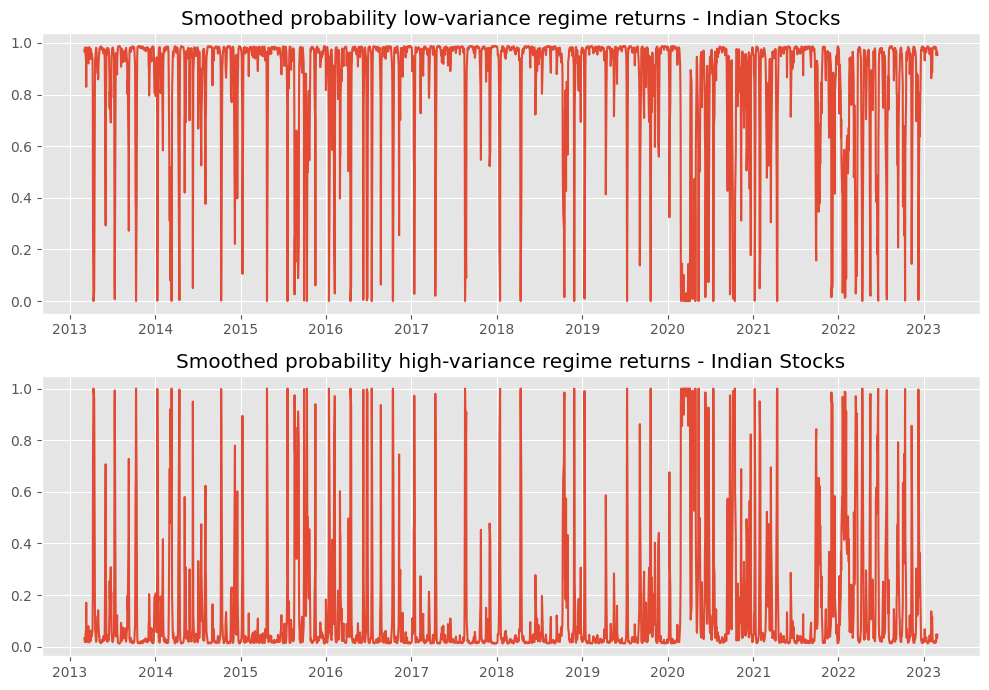

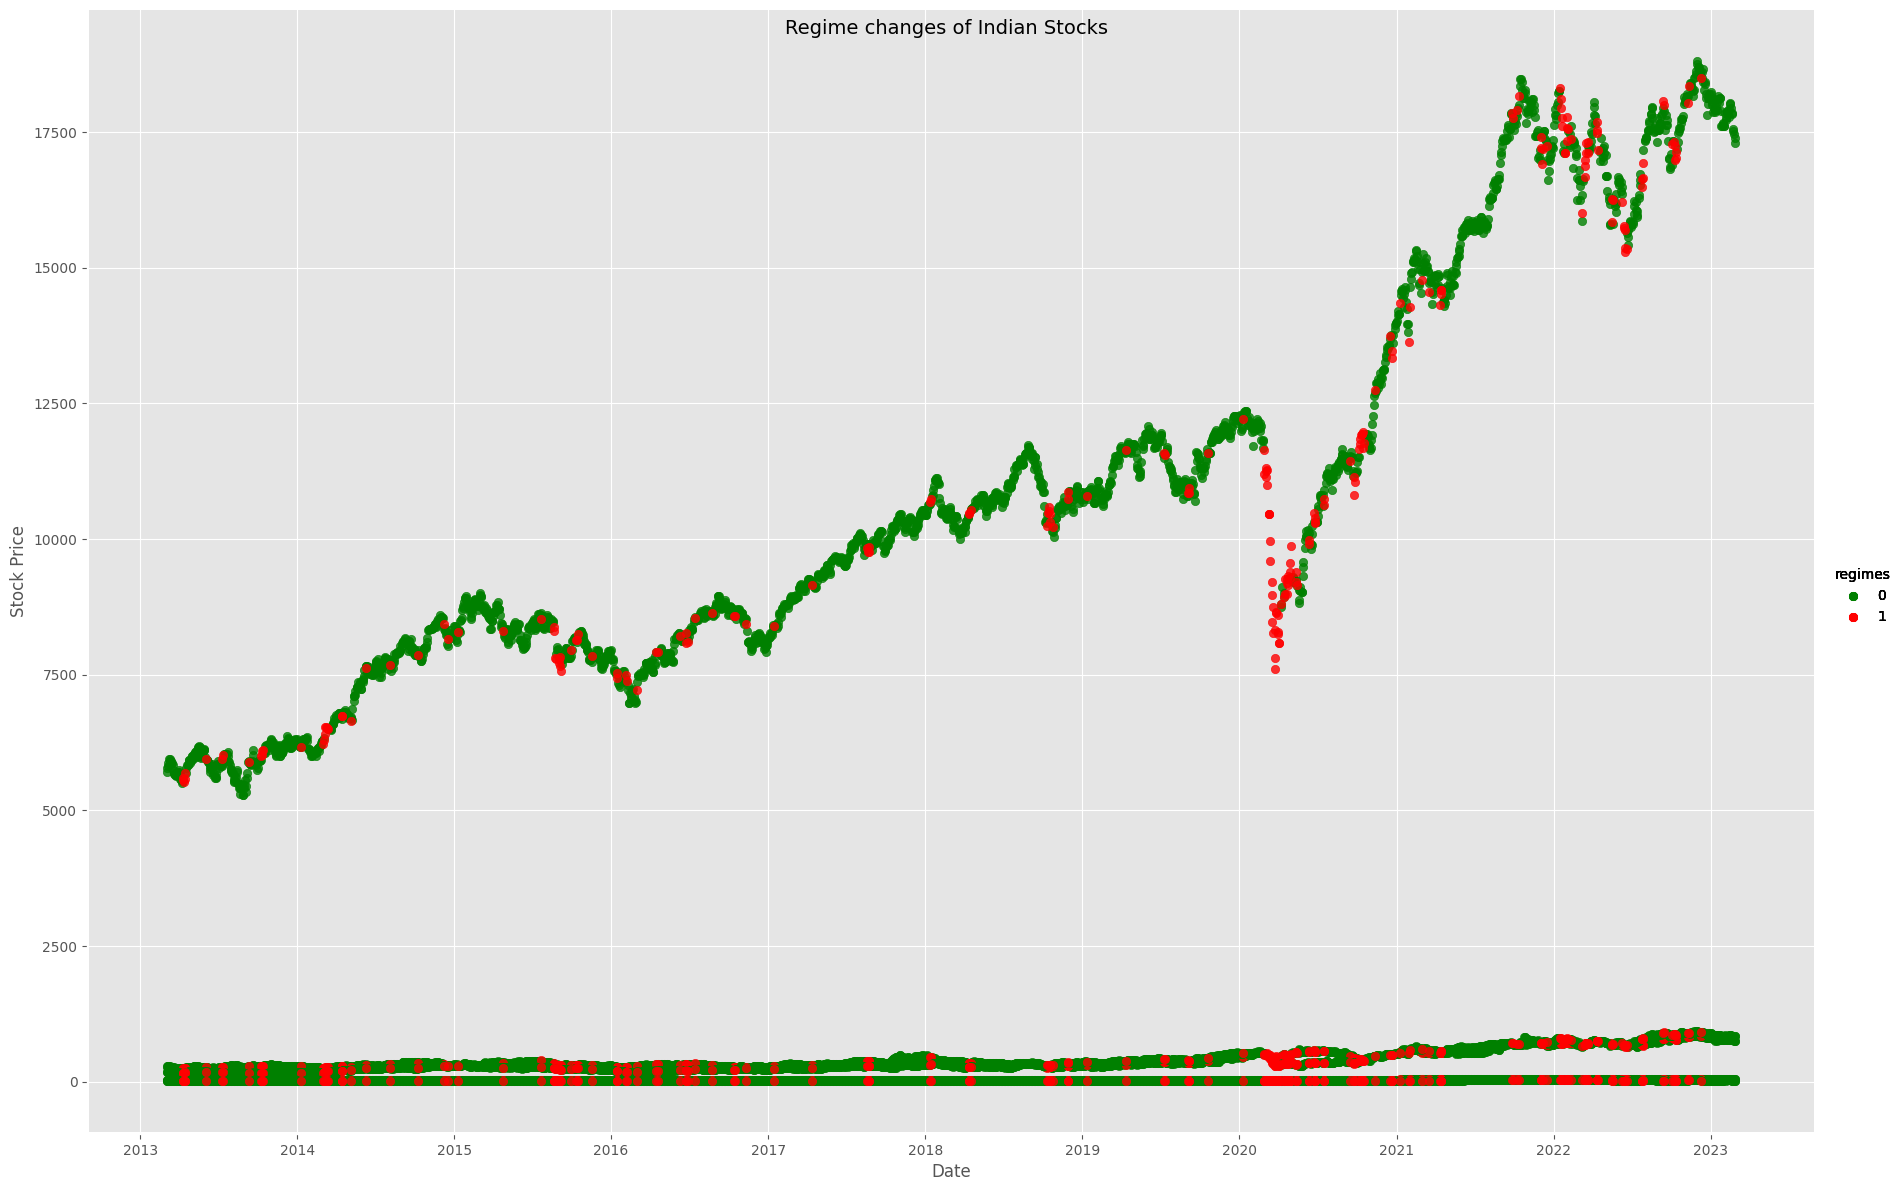

In [ ]:
models = {}
for column in SR_India.columns:
    model = sm.tsa.MarkovRegression(SR_India[column].dropna(),
                                    k_regimes=2, trend='n',
                                    switching_variance=True)
    models[column] = model.fit()

# Display model summaries and plot volatility
for column, model in models.items():
    print(f"Model summary for {column}:")
    print(model.summary())
#Plot regime changes
fig, axes = plt.subplots(2, figsize=(10,7))
ax = axes[0]
ax.plot(model.smoothed_marginal_probabilities[0])
ax.grid(True);
ax.set(title='Smoothed probability low-variance regime returns - Indian Stocks')
ax = axes[1]
ax.plot(model.smoothed_marginal_probabilities[1])
ax.set(title='Smoothed probability high-variance regime returns - Indian Stocks')
fig.tight_layout()
ax.grid(True);
#We checked regime that Indian stocks have gone through from 2013 to 2023.
low_risk = list(model.smoothed_marginal_probabilities[0])
high_risk = list(model.smoothed_marginal_probabilities[1])

shift = []
for i in range(0, len(low_risk)):
    if low_risk[i] > high_risk[i]:
        shift.append(0)
    else:
        shift.append(1)
reg = pd.DataFrame()
reg['regimes'] = shift

ret = stocks.iloc[len(stocks)-len(shift):]
reg_change = (pd.DataFrame(shift, columns=['regimes'], index=ret.index)
          .join(ret, how='inner')
          .reset_index(drop=False)
          .rename(columns={'index':'Date'}))
reg_change.head()

c = 'green', 'red'
order = [0, 1]
plot = sns.FacetGrid(data=reg_change, hue='regimes', hue_order=order,
                   palette=c, aspect=1.31, height=12)

plot.map(plt.scatter, 'Date', "BHARTIARTL.NS", alpha=0.8).add_legend()
plot.map(plt.scatter, 'Date', "ICICIBANK.NS", alpha=0.8).add_legend()
plot.map(plt.scatter, 'Date', "^NSEI", alpha=0.8).add_legend()
plot.map(plt.scatter, 'Date', "NFTY", alpha=0.8).add_legend()
plot.map(plt.scatter, 'Date', "INFY", alpha=0.8).add_legend()
plt.ylabel("Stock Price")
sns.despine(offset=True)
plot.fig.suptitle('Regime changes of Indian Stocks', fontsize=14, fontweight='normal')
fig.tight_layout()
plt.savefig('tmp.png');

**South African Stocks**

Model summary for ABG.JO:
                        Markov Switching Model Results                        
Dep. Variable:                 ABG.JO   No. Observations:                 2600
Model:               MarkovRegression   Log Likelihood                6639.767
Date:                Mon, 21 Aug 2023   AIC                         -13271.534
Time:                        10:57:40   BIC                         -13248.081
Sample:                             0   HQIC                        -13263.036
                               - 2600                                         
Covariance Type:               approx                                         
                             Regime 0 parameters                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         0.0003   1.19e-05     21.392      0.000       0.000       0.000
                          

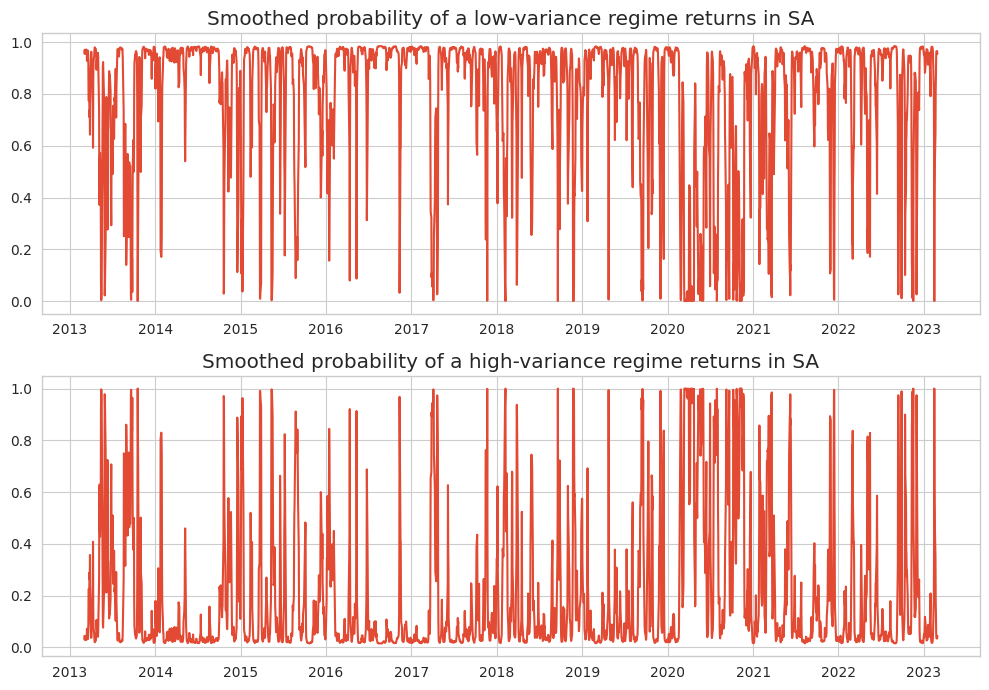

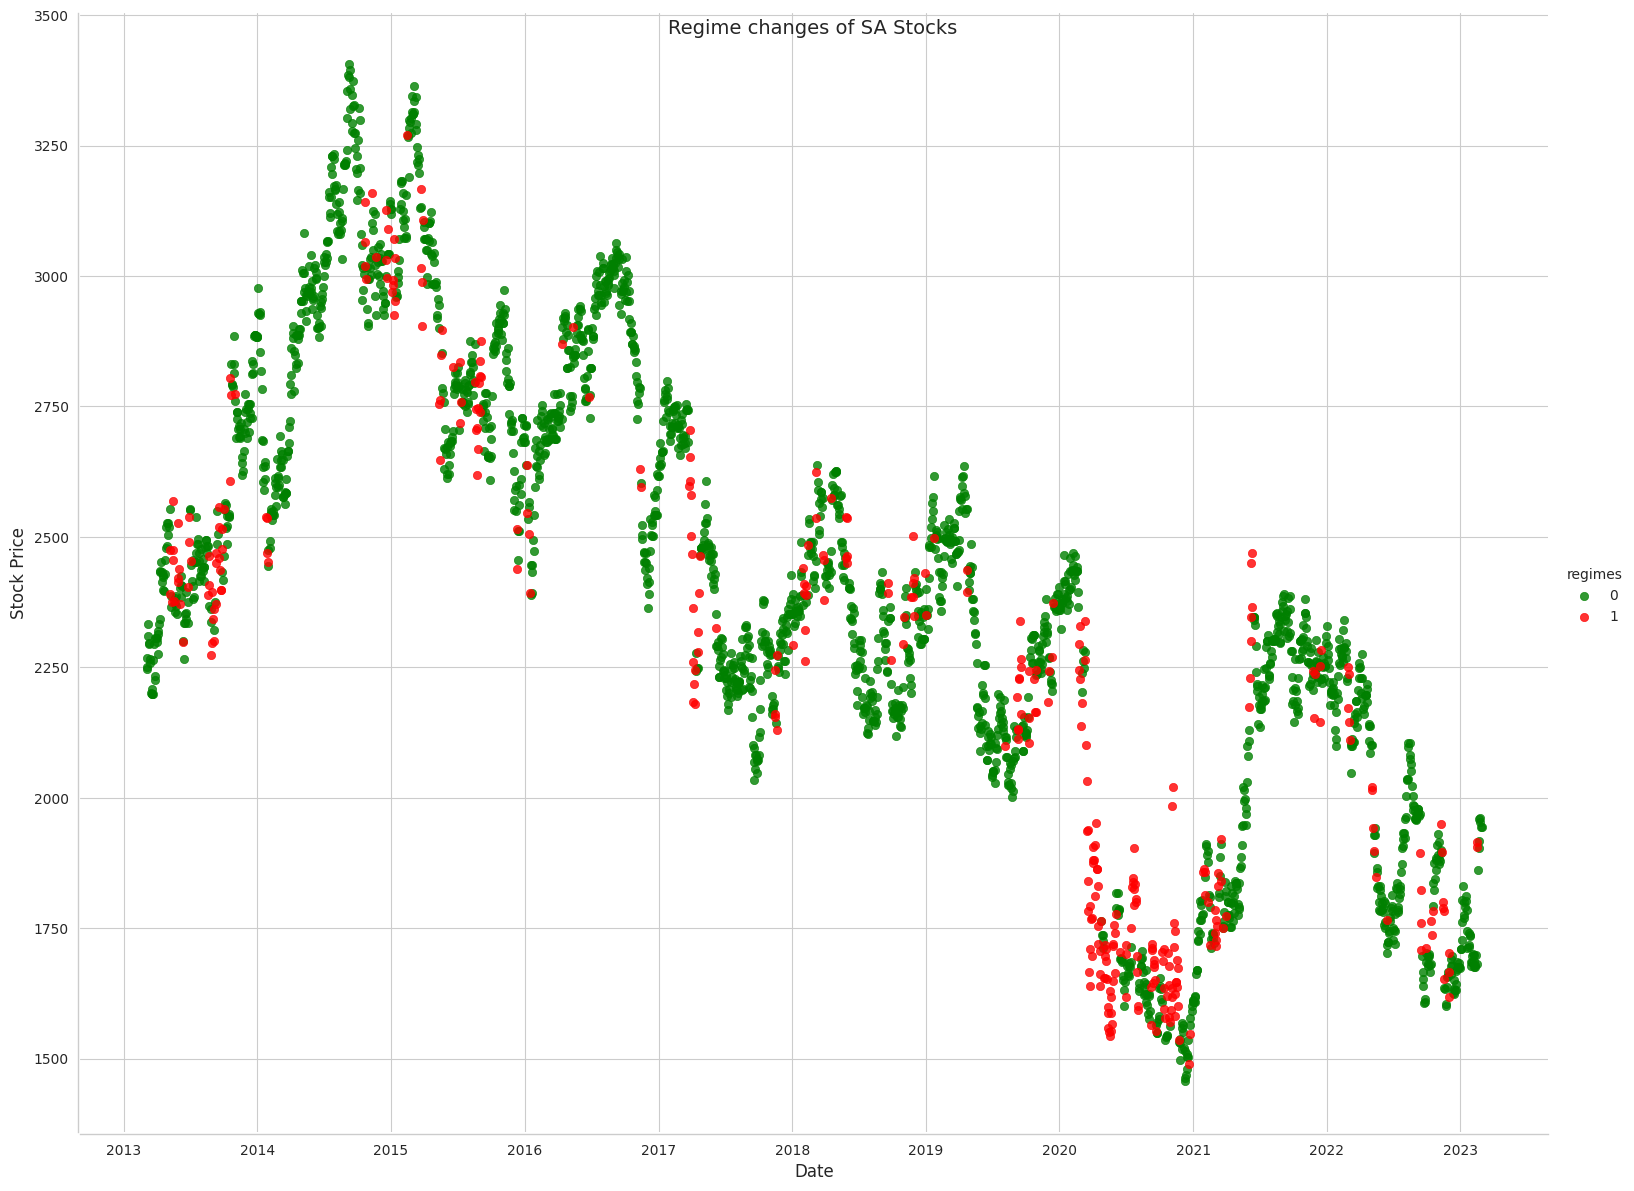

In [ ]:
models = {}
for column in SR_SA.columns:
    model = sm.tsa.MarkovRegression(SR_SA[column],
                                    k_regimes=2, trend='n',
                                    switching_variance=True)
    models[column] = model.fit()

# Display model summaries and plot volatility
for column, model in models.items():
    print(f"Model summary for {column}:")
    print(model.summary())
#Plot regime changes
sns.set_style("whitegrid")
fig, axes = plt.subplots(2, figsize=(10,7))
ax = axes[0]
ax.plot(model.smoothed_marginal_probabilities[0])
ax.grid(True)
ax.set(title='Smoothed probability of a low-variance regime returns in SA')
ax = axes[1]
ax.plot(model.smoothed_marginal_probabilities[1])
ax.set(title='Smoothed probability of a high-variance regime returns in SA')
fig.tight_layout()
ax.grid(True);
#We checked regime that SA stocks have gone through from 2013 to 2023.
low_risk = list(model.smoothed_marginal_probabilities[0])
high_risk = list(model.smoothed_marginal_probabilities[1])

shift = []
for i in range(0, len(low_risk)):
    if low_risk[i] > high_risk[i]:
        shift.append(0)
    else:
        shift.append(1)
reg = pd.DataFrame()
reg['regimes'] = shift

ret = stocks.iloc[len(stocks)-len(shift):]
reg_change = (pd.DataFrame(shift, columns=['regimes'], index=ret.index)
          .join(ret, how='inner')
          .reset_index(drop=False)
          .rename(columns={'index':'Date'}))
reg_change.head()

c = 'green', 'red'
order = [0, 1]
plot = sns.FacetGrid(data=reg_change, hue='regimes', hue_order=order,
                   palette=c, aspect=1.31, height=12)

plot.map(plt.scatter, 'Date', column, alpha=0.8).add_legend()
plt.ylabel("Stock Price")
sns.despine(offset=True)
plot.fig.suptitle('Regime changes of SA Stocks', fontsize=14, fontweight='normal')
fig.tight_layout()
plt.savefig('tmp.png');


**Chinese Stocks**

Model summary for VIPS:
                        Markov Switching Model Results                        
Dep. Variable:                   VIPS   No. Observations:                 2600
Model:               MarkovRegression   Log Likelihood                5055.242
Date:                Mon, 21 Aug 2023   AIC                         -10102.483
Time:                        10:57:55   BIC                         -10079.030
Sample:                             0   HQIC                        -10093.986
                               - 2600                                         
Covariance Type:               approx                                         
                             Regime 0 parameters                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         0.0007    4.6e-05     15.649      0.000       0.001       0.001
                            

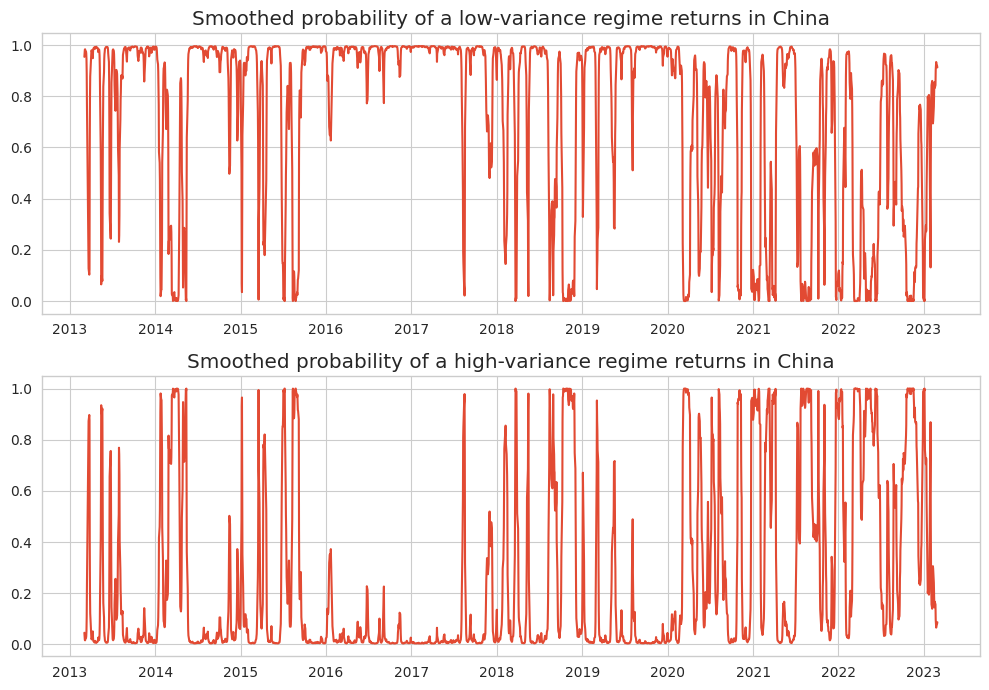

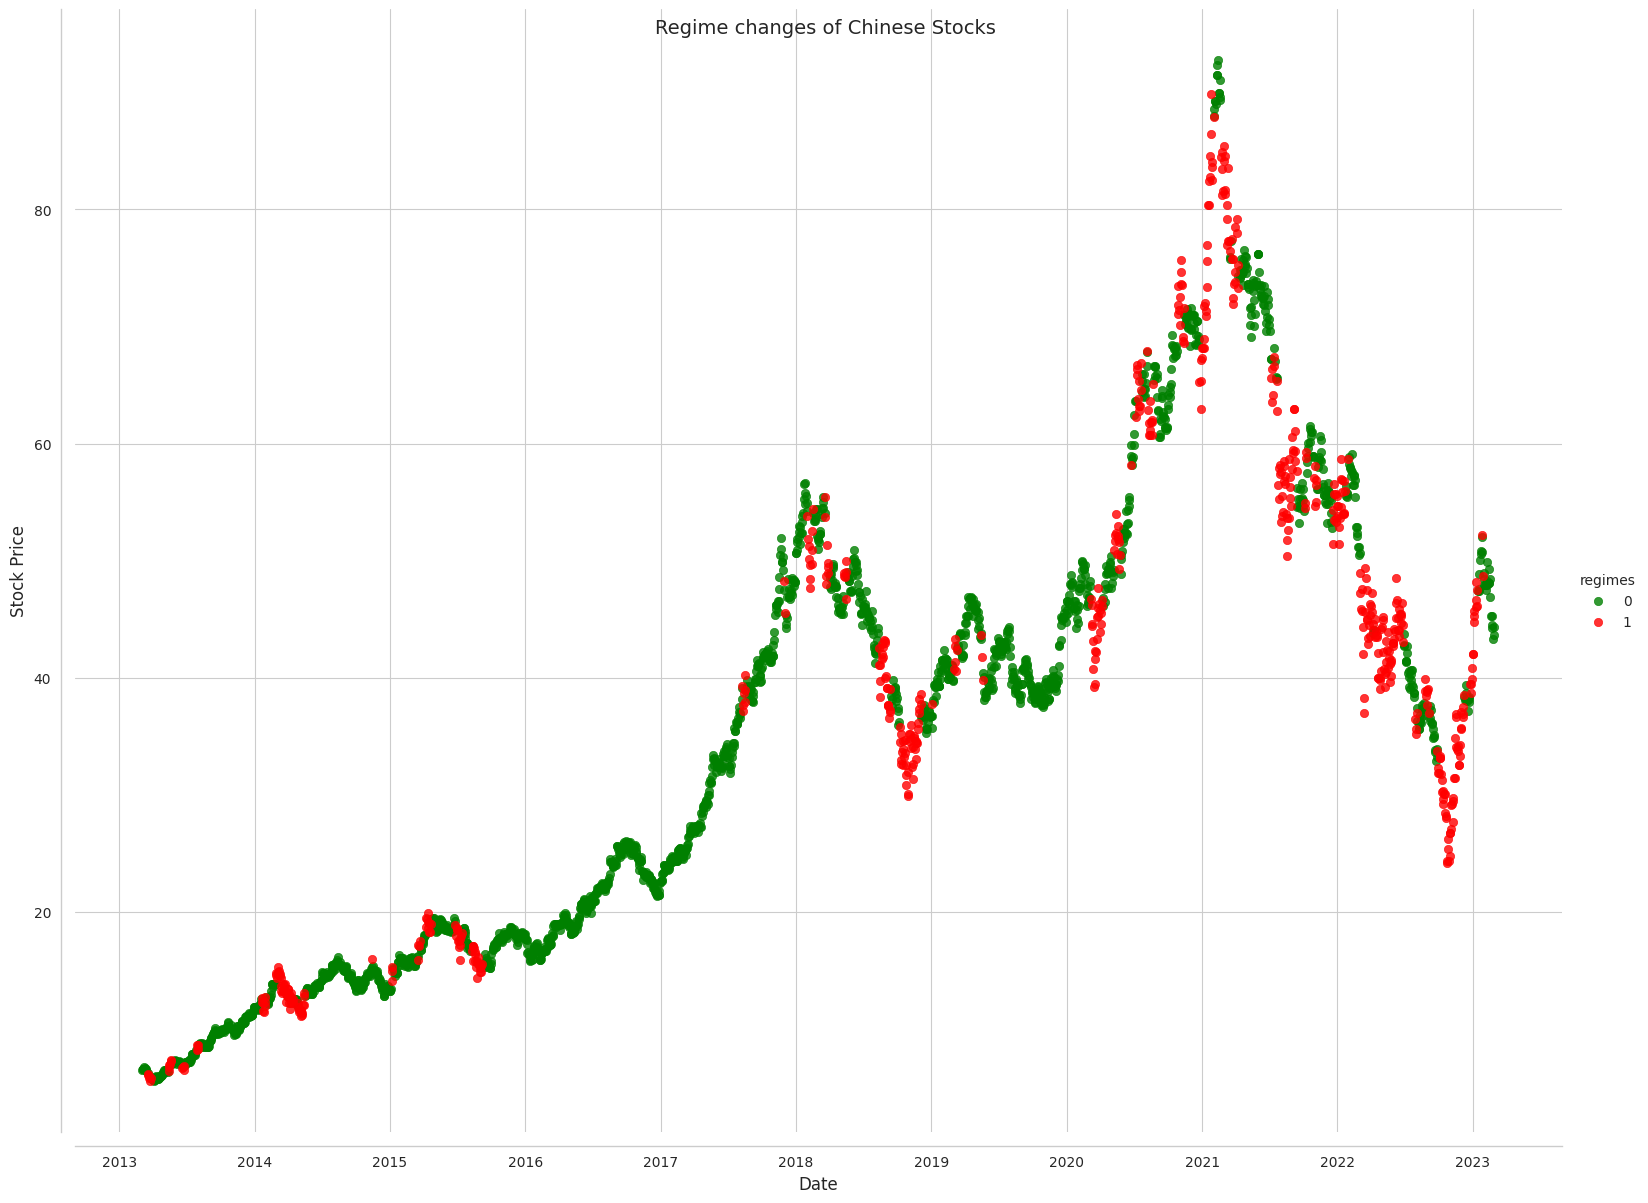

In [ ]:
models = {}
for column in SR_China.columns:
    model = sm.tsa.MarkovRegression(SR_China[column].dropna(),
                                    k_regimes=2, trend='n',
                                    switching_variance=True)
    models[column] = model.fit()

# Display model summaries and plot volatility
for column, model in models.items():
    print(f"Model summary for {column}:")
    print(model.summary())
#Plot regime changes
sns.set_style("whitegrid")
fig, axes = plt.subplots(2, figsize=(10,7))
ax = axes[0]
ax.plot(model.smoothed_marginal_probabilities[0])
ax.grid(True);
ax.set(title='Smoothed probability of a low-variance regime returns in China')
ax = axes[1]
ax.plot(model.smoothed_marginal_probabilities[1])
ax.set(title='Smoothed probability of a high-variance regime returns in China')
fig.tight_layout()
ax.grid(True);
#We checked regime that Chinese stocks have gone through from 2013 to 2023.
low_risk = list(model.smoothed_marginal_probabilities[0])
high_risk = list(model.smoothed_marginal_probabilities[1])

shift = []
for i in range(0, len(low_risk)):
    if low_risk[i] > high_risk[i]:
        shift.append(0)
    else:
        shift.append(1)
reg = pd.DataFrame()
reg['regimes'] = shift

ret = stocks.iloc[len(stocks)-len(shift):]
reg_change = (pd.DataFrame(shift, columns=['regimes'], index=ret.index)
          .join(ret, how='inner')
          .reset_index(drop=False)
          .rename(columns={'index':'Date'}))
reg_change.head()

c = 'green', 'red'
order = [0, 1]
plot = sns.FacetGrid(data=reg_change, hue='regimes', hue_order=order,
                   palette=c, aspect=1.31, height=12)
plot.map(plt.scatter, 'Date', column, alpha=0.8).add_legend()
plt.ylabel("Stock Price")
sns.despine(offset=10)
plot.fig.suptitle('Regime changes of Chinese Stocks', fontsize=14, fontweight='normal')
fig.tight_layout()
plt.savefig('tmp.png');